        Loan Amount          Term  Interest Rate         Income  Credit Score  \
count  10000.000000  10000.000000   10000.000000   10000.000000  10000.000000   
mean   24960.898105     48.088800      17.705773   84475.968670    574.071400   
std    14237.691263     12.000271       7.206506   37241.008754    157.698841   
min      500.575920     36.000000       5.001203   20000.719768    300.000000   
25%    12693.279013     36.000000      11.515715   52168.686860    438.000000   
50%    24880.166560     60.000000      17.823404   84572.883013    575.000000   
75%    37130.314240     60.000000      23.832548  116120.043428    708.000000   
max    49986.024828     60.000000      29.998121  149972.618336    849.000000   

       Employment Length   Loan Status  
count       10000.000000  10000.000000  
mean           14.505300      0.202200  
std             8.659219      0.401661  
min             0.000000      0.000000  
25%             7.000000      0.000000  
50%            15.000000

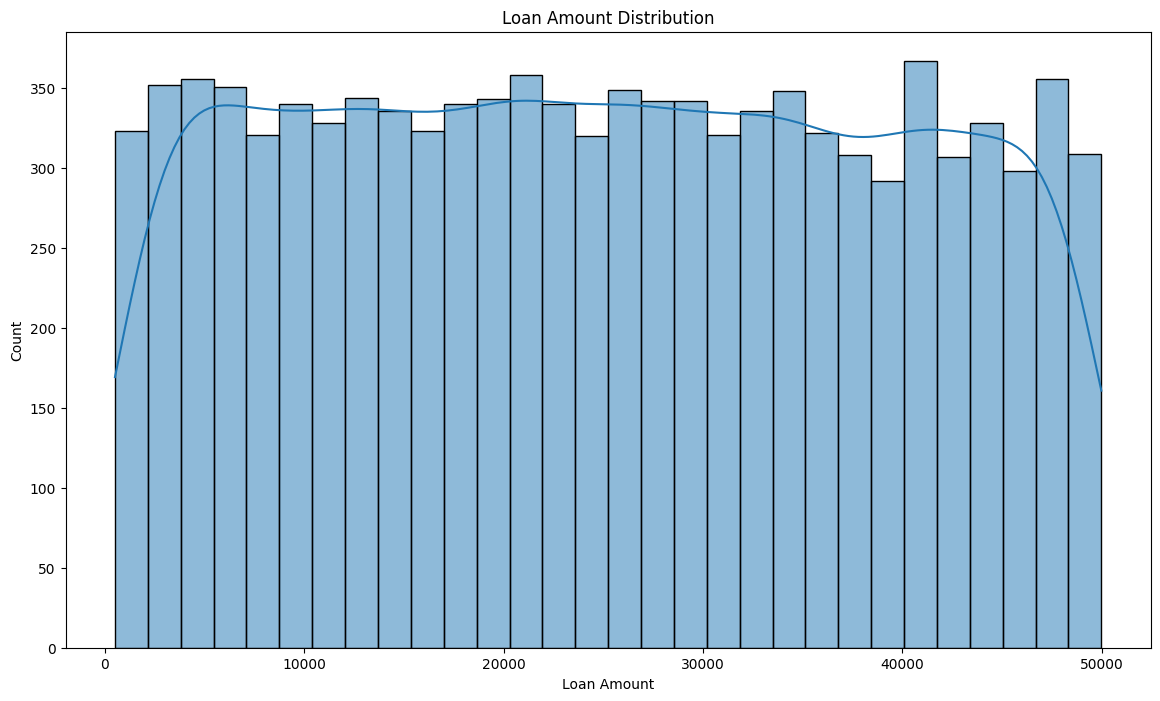

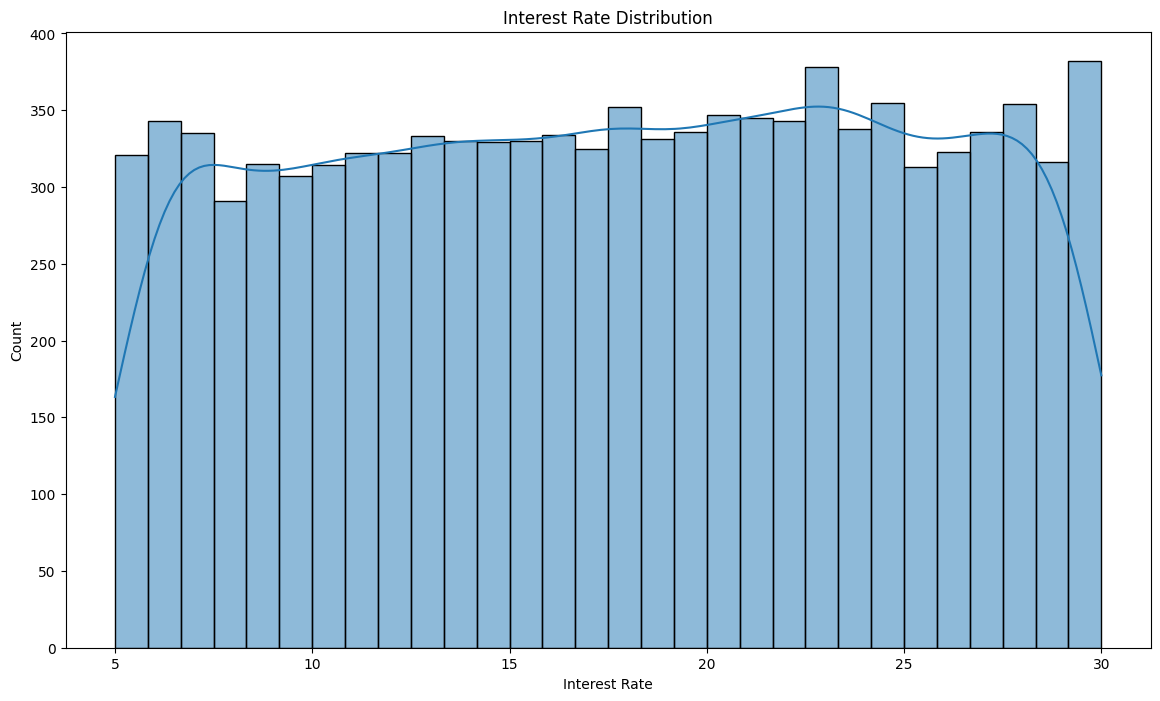

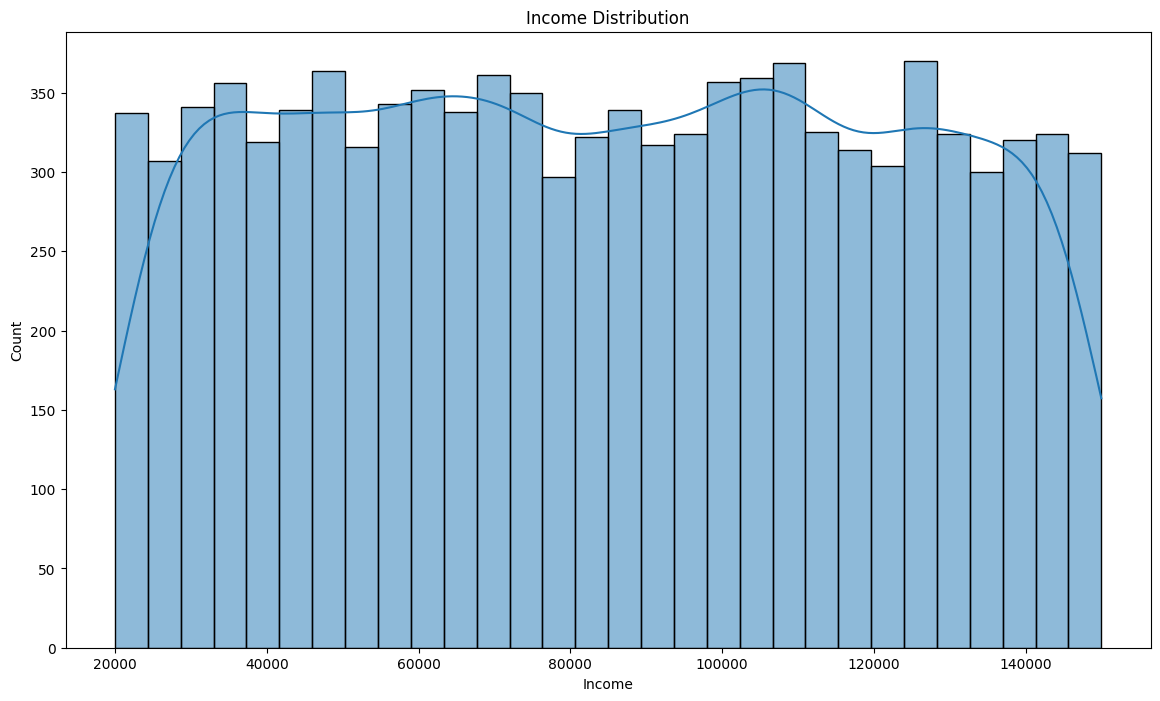

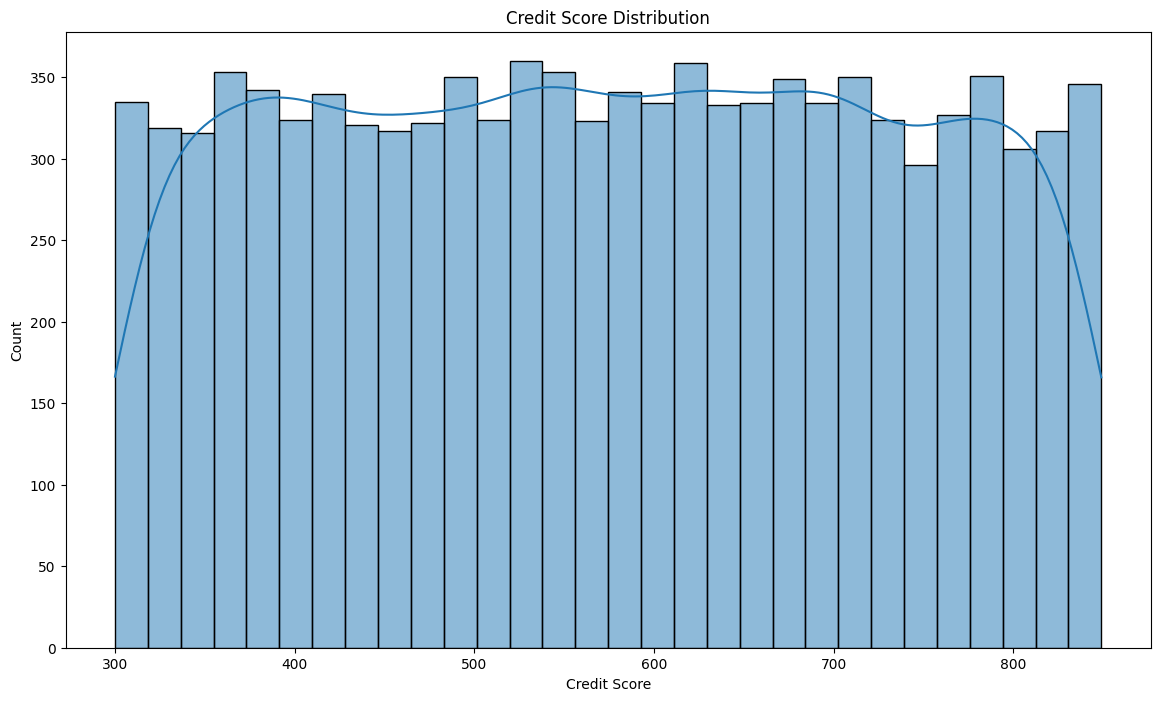

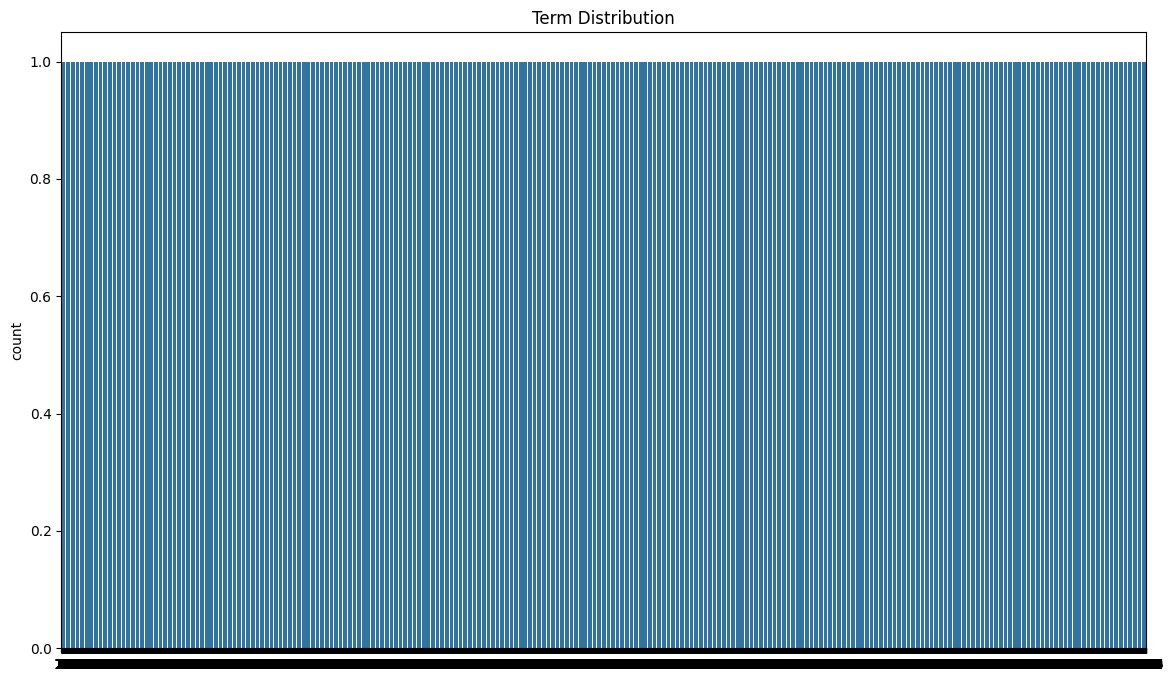

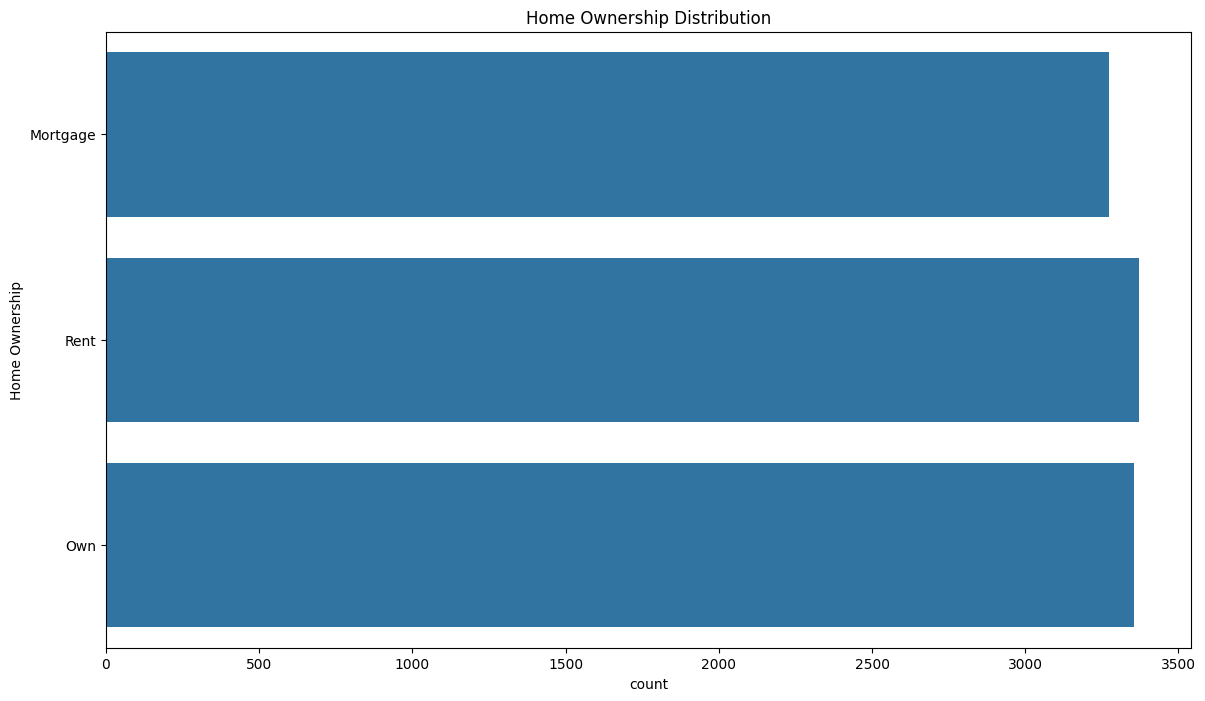

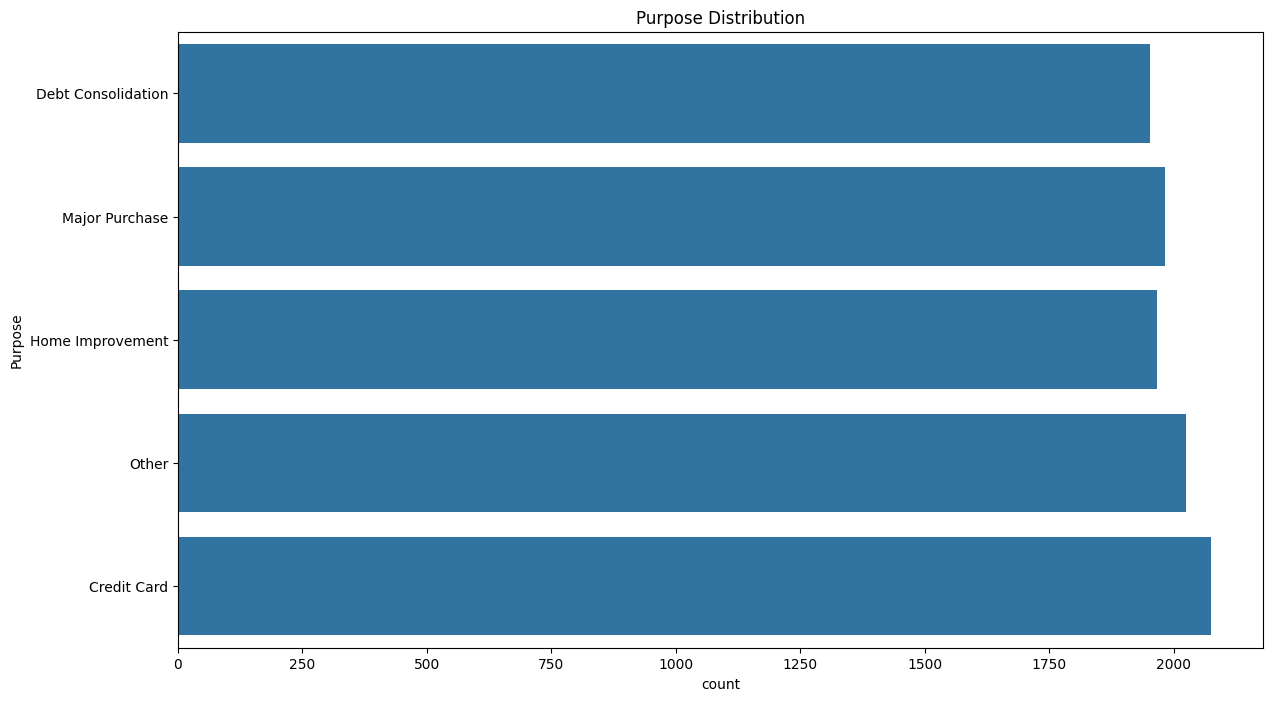

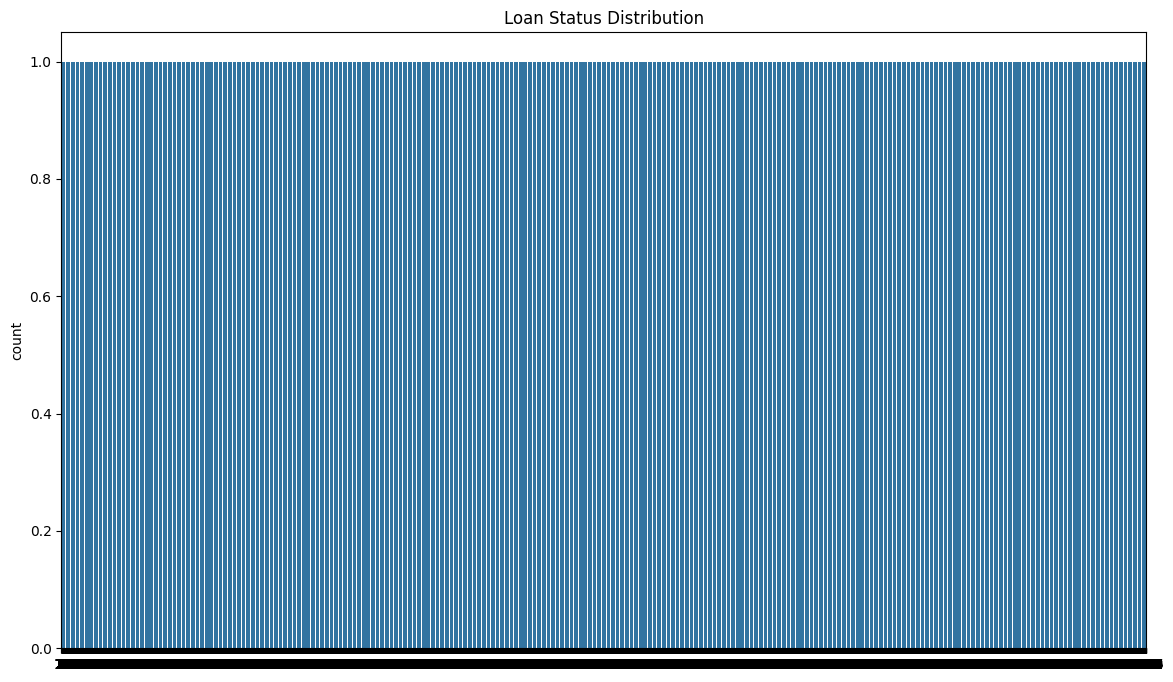

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_loan_default_data.csv')

# Display basic statistics
print(data.describe())

# Display the first few rows of the dataset
print(data.head())

# Plot the distribution of numerical features
plt.figure(figsize=(14, 8))
sns.histplot(data['Loan Amount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Interest Rate'], kde=True, bins=30)
plt.title('Interest Rate Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Income'], kde=True, bins=30)
plt.title('Income Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Credit Score'], kde=True, bins=30)
plt.title('Credit Score Distribution')
plt.show()

# Plot the count of categorical features
plt.figure(figsize=(14, 8))
sns.countplot(data['Term'])
plt.title('Term Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data['Home Ownership'])
plt.title('Home Ownership Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data['Purpose'])
plt.title('Purpose Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data['Loan Status'])
plt.title('Loan Status Distribution')
plt.show()




In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
data['Home Ownership'] = LabelEncoder().fit_transform(data['Home Ownership'])
data['Purpose'] = LabelEncoder().fit_transform(data['Purpose'])

# Define features and target
features = ['Loan Amount', 'Term', 'Interest Rate', 'Income', 'Credit Score', 'Employment Length', 'Home Ownership', 'Purpose']
target = 'Loan Status'

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print(f'MLP Model Accuracy: {mlp_accuracy:.4f}')


Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: 0.5130 - accuracy: 0.7959 - val_loss: 0.5149 - val_accuracy: 0.7910
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5036 - accuracy: 0.7995 - val_loss: 0.5129 - val_accuracy: 0.7910
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5009 - accuracy: 0.7995 - val_loss: 0.5143 - val_accuracy: 0.7910
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4999 - accuracy: 0.7995 - val_loss: 0.5140 - val_accuracy: 0.7910
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4987 - accuracy: 0.7995 - val_loss: 0.5132 - val_accuracy: 0.7910
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4970 - accuracy: 0.7995 - val_loss: 0.5139 - val_accuracy: 0.7910
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4967 - accuracy: 0.7995 - val_loss: 0.5137 - val_accuracy: 0.7910
Epoch 

In [7]:
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN Model Accuracy: {cnn_accuracy:.4f}')


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.5124 - accuracy: 0.7936 - val_loss: 0.5167 - val_accuracy: 0.7910
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5050 - accuracy: 0.7995 - val_loss: 0.5141 - val_accuracy: 0.7910
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.7995 - val_loss: 0.5138 - val_accuracy: 0.7910
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5015 - accuracy: 0.7995 - val_loss: 0.5163 - val_accuracy: 0.7910
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5005 - accuracy: 0.7995 - val_loss: 0.5148 - val_accuracy: 0.7910
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4997 - accuracy: 0.7995 - val_loss: 0.5158 - val_accuracy: 0.7910
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4990 - accuracy: 0.7995 - val_loss: 0.5175 - val_accuracy: 0.7910
Epoch 

In [8]:
from tensorflow.keras.layers import LSTM

# Reshape data for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(32, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print(f'RNN Model Accuracy: {rnn_accuracy:.4f}')


Epoch 1/10
250/250 [==============================] - 3s 6ms/step - loss: 0.5141 - accuracy: 0.7995 - val_loss: 0.5135 - val_accuracy: 0.7910
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.5025 - accuracy: 0.7995 - val_loss: 0.5130 - val_accuracy: 0.7910
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.5026 - accuracy: 0.7995 - val_loss: 0.5128 - val_accuracy: 0.7910
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.5026 - accuracy: 0.7995 - val_loss: 0.5133 - val_accuracy: 0.7910
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.5020 - accuracy: 0.7995 - val_loss: 0.5137 - val_accuracy: 0.7910
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 0.5014 - accuracy: 0.7995 - val_loss: 0.5227 - val_accuracy: 0.7910
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.5022 - accuracy: 0.7995 - val_loss: 0.5143 - val_accuracy: 0.7910
Epoch 